# Citation: Keras Model Code from [tensorflow.org](https://www.tensorflow.org/tutorials/keras/basic_text_classification) text classification
Testing out data preprocessing and mdoels for text analysis.

In [1]:
import nltk
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import sklearn

Using TensorFlow backend.


In [2]:
########## Read in the datafile
df = pd.read_csv("suggestions_data_balanced.csv", engine = 'python');
df.fillna(-1, inplace=True)
num_data = len(df)
print(num_data)
print(df.dtypes)

7272
is_prompt_exists     int64
comments            object
dtype: object


In [3]:
########## Shuffle the data for randomization purposes
# df = sklearn.utils.shuffle(df)
df = df.iloc[np.random.permutation(len(df))]
df = df.reset_index(drop=True)

In [4]:
print("Data:", df['comments'][0], "\nLabel:", df['is_prompt_exists'][0]) # Check randomization

Data: The authors need to be more explicit about the changes they will make. It is good that the team communicated that they will update the wiki to reflect the current DB schema, however instead of stating the potential changes, the structure of the entire wiki was instead presented. I think once the team dives a bit deeper into the project, they will be able to provide the names of the DB tables that were changed or removed. 
Label: 1


In [5]:
###################### Create 
def bagofwords():
#     sentence = []
#     sentence.append("Hello there my name is name is blank.")
#     sentence.append("This is another sample name there phrase.")
#     text = nltk.word_tokenize(sentence[0].lower())
#     words = list(set(text))
#     text = nltk.word_tokenize(sentence[1].lower())
#     words.append(list(set(text)))
#     print(words)
    length = 0
    a = []
    for loop in range(num_data):
        comment = df['comments'][loop]
        sentTok = nltk.sent_tokenize(comment)
        length = length + len(sentTok)
        for sentence in sentTok:
    #         a.append("Hello there my name is name is blank.")
    #         a.append("This is another sample name there phrase.")
            a.append(sentence)
    
    
    a = (' '.join(a)).lower()
#     print(a)
#     print('\n')
    text = nltk.word_tokenize(a)
#     print(text)
    newset = set()
    for word in text:
#         print(word)
        newset.add(word)
#     print(newset)
#     print('\n\n')
    # Fill in found words
    word_to_ix = { w:(i+4) for i,w in enumerate(sorted(newset)) }
    ix_to_word = { (i+4):w for i,w in enumerate(sorted(newset)) }
    # Fill in reserved values
    ix_to_word[0] = "<PAD>"
    ix_to_word[1] = "<START>"
    ix_to_word[2] = "<UNK>"
    ix_to_word[3] = "<UNUSED>"
    word_to_ix["<PAD>"] = 0 # Used to equalize text length
    word_to_ix["<START>"] = 1
    word_to_ix["<UNK>"] = 2  # unknown value
    word_to_ix["<UNUSED>"] = 3
    return word_to_ix, ix_to_word
# print("\nLENGTH:", length)

In [6]:
word_to_ix, ix_to_word = bagofwords()
# print(ix_to_word)
# print('\n')
# print(word_to_ix)

In [7]:
print(ix_to_word[3])
print(word_to_ix["straightforward"]) # Ensure word is in dictionary
print(len(ix_to_word))
print(len(word_to_ix))

<UNUSED>
4591
5392
5392


In [8]:
###################### Convert original data to number representations
loop = 0
for loop in range(num_data):
    if (loop % 500 == 0):
        print("Update:", loop) # Check spot in converter
    comment = df['comments'][loop]
    comment = comment.lower()
    text = nltk.word_tokenize(comment)
    length = len(text)
    for i in range(length):
        text[i] = word_to_ix[text[i]]
#         print(text[i]) 
#     print(text)
    df['comments'][loop] = text

Update: 0


/Users/gabrielfinnrzingle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Update: 500
Update: 1000
Update: 1500
Update: 2000
Update: 2500
Update: 3000
Update: 3500
Update: 4000
Update: 4500
Update: 5000
Update: 5500
Update: 6000
Update: 6500
Update: 7000


In [416]:
##################### Convert words back to check conversion 
# for i in range(num_data):
#     comment = df['comments'][i]
#     length = len(comment)
#     count = 0;
#     text = []
#     for num in comment:
#         text.append(ix_to_word[num])
#         count += 1
#     text = (' '.join(text))
#     print(text,'\n')

the changes mentioned are pretty straightforward , more information on how their plan to make those changes are should be provided in the document . 

the images and visual aids explain the flow very well . there were no uml diagrams in the document though . 

although , the writeup explains the functionality very well , they have n't mentioned which design pattern they have used an why ? . 

no new tests have been added 

changes are very good , the author has proposed design patterns they will be used in the implementation , along with that method to calculate score has been explained elaborately 

the design appears to be sound , but i think more details are needed . 

1. the plan is sound and seems to be clearly explained bullet points 

the principles used to solving the problem are sound 

yes , the code is well written and follows the conventions of ruby design principles . 

code written following the coding standards 



In [14]:
############# Initialize training data
num_train = int(num_data * 0.8) # df.head this amount
num_test = int(num_data - num_train) # df.tail this amount
# print(num_train)
# print(num_test)
# print(len(df), "  ", num_train+num_test)
train_data = df['comments'].head(num_train)
# for i in range(8):
#     print(train_data[i])

In [15]:
############# Initialize testing data **(requires full dataset conversion for tail() to work)**
# print(df['comments'].tail(2))
test_data = df['comments'].tail(num_test)
# test_data = df['comments'].head(4) #### Remove later (PLACEHOLDER STATEMENT)
# for i in range(2):
#     print(test_data[i])

In [16]:
############ Function enabling conversion of indexed number sentence into word sentence
def decode_review(text):
#     return ' '.join([reverse_word_index.get(i, '?') for i in text])
    return ' '.join([ix_to_word[i] for i in text])

In [20]:
print(decode_review(train_data[4]))

they very thoroughly tested the job applications model and controller . there were tests for the admin user but i could n't replicate them on the actual website so either the tests did n't pass or the user given in the readme was n't an admin .


In [21]:
############# Find the maximum sentence length to use for padding training data
maxlength = 0
for array in train_data:
    maxlength = max(len(array),maxlength)
print("Train:", maxlength)
for array in test_data:
    maxlength = max(len(array),maxlength)
print("Test:", maxlength)

Train: 343
Test: 343


In [59]:
############# Initialize training and test labels
train_labels = df['is_prompt_exists'].head(num_train)
test_labels = df['is_prompt_exists'].tail(num_test)
for i in range(10):
    print(train_labels[i])

1
1
-1
1
-1
-1
1
-1
1
-1


In [23]:
############# Pad the words to equalize array length
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_to_ix["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlength)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_to_ix["<PAD>"],
                                                      padding='post',
                                                      maxlen=maxlength)

In [24]:
len(train_data[0]), len(train_data[1]) # Check the new length of some train data

(343, 343)

In [25]:
print(train_data[0]) # Check new padded number sentences

[4853  760 3247 4916  827 3188 2008  405 4853 1026 4866 5306 2993  110
 2738 2729 2299 4851 4853 4781 1170 4851 4866 5306 5074 4853 5302 4916
 3937 4853 1445 1474 4213   85 2464 2653 3347 4565 4853 3634 1026   85
 4853 4609 3347 4853 1877 5302 5241 2653 3670  110 2477 4870 3364 4853
 4781 1691  398  869 1510 2700 4853 3733   85 4866 5306  827  404 4916
 3769 4853 3223 3347 4853 1474 4749 4851 5275 1025 3397 3981  110    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [26]:
############# Creates the model
vocab_size = num_data # suggestions_data_balanced.csv dataset length becomes input shape: 7272

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          116352    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 116,641
Trainable params: 116,641
Non-trainable params: 0
_________________________________________________________________


In [27]:
############ Configured model with optimizer and loss function
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

In [44]:
########### Initiate validation sets
# Note -> vocab_size = len(df)
val_size = int(num_train * 0.1) # Set apart 10% of train data for validation

x_val = train_data[:num_train-val_size]
partial_x_train = train_data[num_train-val_size:]

y_val = train_labels[:num_train-val_size]
partial_y_train = train_labels[num_train-val_size:]

In [45]:
# print(x_val[0])
# print(partial_x_train[0])
print(len(train_data))
print(len(x_val))
print(len(partial_x_train))

5817
5236
581


In [76]:
############ Trains the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=400,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 581 samples, validate on 5236 samples
Epoch 1/400
581/581 [==============================] - 0s 102us/step - loss: -7.5639 - acc: 0.5129 - val_loss: 0.3191 - val_acc: 0.2511
Epoch 2/400
581/581 [==============================] - 0s 96us/step - loss: -7.5620 - acc: 0.5129 - val_loss: 0.2639 - val_acc: 0.2502
Epoch 3/400
581/581 [==============================] - 0s 110us/step - loss: -7.5602 - acc: 0.5112 - val_loss: 0.2231 - val_acc: 0.2490
Epoch 4/400
581/581 [==============================] - 0s 104us/step - loss: -7.5589 - acc: 0.5112 - val_loss: 0.2533 - val_acc: 0.2502
Epoch 5/400
581/581 [==============================] - 0s 100us/step - loss: -7.5595 - acc: 0.5112 - val_loss: 0.3209 - val_acc: 0.2517
Epoch 6/400
581/581 [==============================] - 0s 104us/step - loss: -7.5620 - acc: 0.5129 - val_loss: 0.3937 - val_acc: 0.2534
Epoch 7/400
581/581 [==============================] - 0s 106us/step - loss: -7.5637 - acc: 0.5129 - val_loss: 0.5001 - val_acc: 0.2567
Ep

Epoch 61/400
581/581 [==============================] - 0s 95us/step - loss: -7.5713 - acc: 0.5164 - val_loss: 0.6242 - val_acc: 0.2582
Epoch 62/400
581/581 [==============================] - 0s 96us/step - loss: -7.5685 - acc: 0.5129 - val_loss: 0.4564 - val_acc: 0.2553
Epoch 63/400
581/581 [==============================] - 0s 96us/step - loss: -7.5654 - acc: 0.5129 - val_loss: 0.3507 - val_acc: 0.2523
Epoch 64/400
581/581 [==============================] - 0s 94us/step - loss: -7.5630 - acc: 0.5129 - val_loss: 0.2996 - val_acc: 0.2511
Epoch 65/400
581/581 [==============================] - 0s 94us/step - loss: -7.5616 - acc: 0.5129 - val_loss: 0.2929 - val_acc: 0.2510
Epoch 66/400
581/581 [==============================] - 0s 91us/step - loss: -7.5614 - acc: 0.5129 - val_loss: 0.3190 - val_acc: 0.2515
Epoch 67/400
581/581 [==============================] - 0s 91us/step - loss: -7.5622 - acc: 0.5129 - val_loss: 0.4009 - val_acc: 0.2538
Epoch 68/400
581/581 [==========================

Epoch 121/400
581/581 [==============================] - 0s 96us/step - loss: -7.5731 - acc: 0.5164 - val_loss: 1.3738 - val_acc: 0.2750
Epoch 122/400
581/581 [==============================] - 0s 93us/step - loss: -7.5720 - acc: 0.5164 - val_loss: 1.3390 - val_acc: 0.2746
Epoch 123/400
581/581 [==============================] - 0s 98us/step - loss: -7.5731 - acc: 0.5164 - val_loss: 1.3123 - val_acc: 0.2744
Epoch 124/400
581/581 [==============================] - 0s 96us/step - loss: -7.5730 - acc: 0.5164 - val_loss: 1.2916 - val_acc: 0.2741
Epoch 125/400
581/581 [==============================] - 0s 95us/step - loss: -7.5730 - acc: 0.5164 - val_loss: 1.2766 - val_acc: 0.2741
Epoch 126/400
581/581 [==============================] - 0s 96us/step - loss: -7.5730 - acc: 0.5164 - val_loss: 1.2676 - val_acc: 0.2733
Epoch 127/400
581/581 [==============================] - 0s 93us/step - loss: -7.5730 - acc: 0.5164 - val_loss: 1.2623 - val_acc: 0.2733
Epoch 128/400
581/581 [==================

Epoch 181/400
581/581 [==============================] - 0s 96us/step - loss: -7.5728 - acc: 0.5164 - val_loss: 1.0890 - val_acc: 0.2691
Epoch 182/400
581/581 [==============================] - 0s 97us/step - loss: -7.5725 - acc: 0.5164 - val_loss: 1.0020 - val_acc: 0.2680
Epoch 183/400
581/581 [==============================] - 0s 97us/step - loss: -7.5720 - acc: 0.5164 - val_loss: 0.9539 - val_acc: 0.2676
Epoch 184/400
581/581 [==============================] - 0s 94us/step - loss: -7.5719 - acc: 0.5164 - val_loss: 0.9386 - val_acc: 0.2672
Epoch 185/400
581/581 [==============================] - 0s 97us/step - loss: -7.5718 - acc: 0.5164 - val_loss: 0.9365 - val_acc: 0.2672
Epoch 186/400
581/581 [==============================] - 0s 96us/step - loss: -7.5718 - acc: 0.5164 - val_loss: 0.9456 - val_acc: 0.2674
Epoch 187/400
581/581 [==============================] - 0s 93us/step - loss: -7.5719 - acc: 0.5164 - val_loss: 0.9909 - val_acc: 0.2680
Epoch 188/400
581/581 [==================

581/581 [==============================] - 0s 94us/step - loss: -7.5716 - acc: 0.5164 - val_loss: 0.9955 - val_acc: 0.2670
Epoch 241/400
581/581 [==============================] - 0s 94us/step - loss: -7.5718 - acc: 0.5164 - val_loss: 1.0560 - val_acc: 0.2670
Epoch 242/400
581/581 [==============================] - 0s 94us/step - loss: -7.5724 - acc: 0.5164 - val_loss: 1.1029 - val_acc: 0.2674
Epoch 243/400
581/581 [==============================] - 0s 94us/step - loss: -7.5727 - acc: 0.5164 - val_loss: 1.1871 - val_acc: 0.2701
Epoch 244/400
581/581 [==============================] - 0s 93us/step - loss: -7.5729 - acc: 0.5164 - val_loss: 1.2588 - val_acc: 0.2720
Epoch 245/400
581/581 [==============================] - 0s 94us/step - loss: -7.5727 - acc: 0.5164 - val_loss: 1.2828 - val_acc: 0.2727
Epoch 246/400
581/581 [==============================] - 0s 94us/step - loss: -7.5728 - acc: 0.5164 - val_loss: 1.2922 - val_acc: 0.2727
Epoch 247/400
581/581 [==============================] 

Epoch 300/400
581/581 [==============================] - 0s 98us/step - loss: -7.5718 - acc: 0.5164 - val_loss: 0.9422 - val_acc: 0.2664
Epoch 301/400
581/581 [==============================] - 0s 95us/step - loss: -7.5719 - acc: 0.5164 - val_loss: 0.9658 - val_acc: 0.2670
Epoch 302/400
581/581 [==============================] - 0s 96us/step - loss: -7.5720 - acc: 0.5164 - val_loss: 0.9957 - val_acc: 0.2678
Epoch 303/400
581/581 [==============================] - 0s 95us/step - loss: -7.5722 - acc: 0.5164 - val_loss: 1.0292 - val_acc: 0.2678
Epoch 304/400
581/581 [==============================] - 0s 96us/step - loss: -7.5724 - acc: 0.5164 - val_loss: 1.0730 - val_acc: 0.2681
Epoch 305/400
581/581 [==============================] - 0s 97us/step - loss: -7.5725 - acc: 0.5164 - val_loss: 1.1259 - val_acc: 0.2689
Epoch 306/400
581/581 [==============================] - 0s 97us/step - loss: -7.5727 - acc: 0.5164 - val_loss: 1.1732 - val_acc: 0.2701
Epoch 307/400
581/581 [==================

581/581 [==============================] - 0s 95us/step - loss: -7.5727 - acc: 0.5164 - val_loss: 1.3382 - val_acc: 0.2741
Epoch 360/400
581/581 [==============================] - 0s 96us/step - loss: -7.5727 - acc: 0.5164 - val_loss: 1.3578 - val_acc: 0.2743
Epoch 361/400
581/581 [==============================] - 0s 97us/step - loss: -7.5727 - acc: 0.5164 - val_loss: 1.4046 - val_acc: 0.2750
Epoch 362/400
581/581 [==============================] - 0s 94us/step - loss: -7.5725 - acc: 0.5164 - val_loss: 1.4599 - val_acc: 0.2760
Epoch 363/400
581/581 [==============================] - 0s 98us/step - loss: -7.5725 - acc: 0.5164 - val_loss: 1.4819 - val_acc: 0.2769
Epoch 364/400
581/581 [==============================] - 0s 98us/step - loss: -7.5724 - acc: 0.5164 - val_loss: 1.4425 - val_acc: 0.2754
Epoch 365/400
581/581 [==============================] - 0s 100us/step - loss: -7.5725 - acc: 0.5164 - val_loss: 1.3575 - val_acc: 0.2743
Epoch 366/400
581/581 [==============================]

In [77]:
########### Evaluate the model
results = model.evaluate(test_data, test_labels)

print(results)

1455/1455 [==============================] - 0s 19us/step
[1.0102986268571152, 0.2659793814791437]


In [78]:
########### Graph the data
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

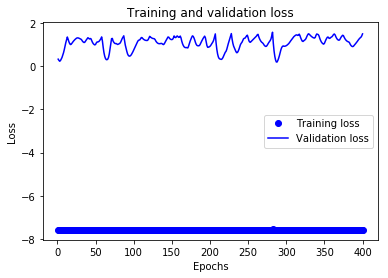

In [79]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

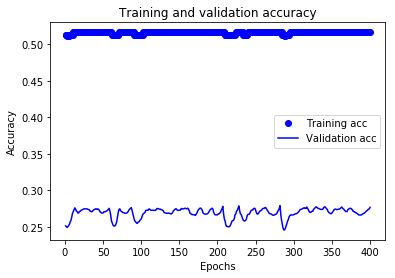

In [80]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()